<a href="https://colab.research.google.com/github/Jashmavani9002/cs666student/blob/main/Copy_of_CS666_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

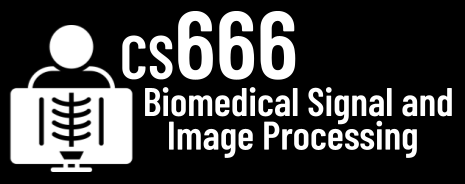
#Assignment 4

In [1]:
# NAME: JASHKUMAR MAVANI

In [2]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia and covid in xrays!

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 20.7 MB/s eta 0:00:00


In [5]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [6]:
# Please download this file: https://cs666.org/data/xray/ with the wget command!
# Note: Please use the forwarded dropbox link and change dl=0 to dl=1!
# This is a subset of the Kaggle Pneumonia + Covid Datasets!

In [7]:
# Run this code to extract the zip file and to create
# the folder structure of normal/, pneumonia/, and covid/ images.
# Each folder contains the first images of the Kaggle datasets.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'
COVID_DIR = 'covid/'

In [8]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [9]:
# TODO: Please display this image and print the dimensions!

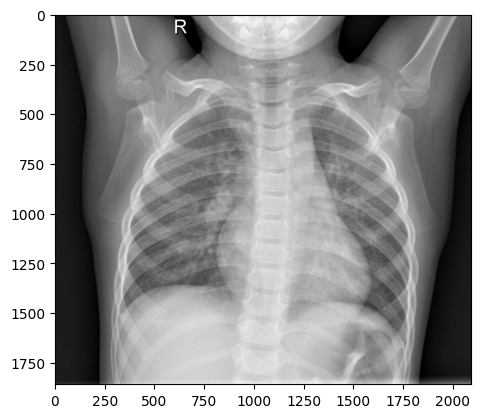

In [10]:
# TODO: YOUR CODE
# Display image
plt.imshow(img, cmap='gray')

In [11]:
# Print the dimensions of image
height, width = img.shape[:2]
print("Dimensions of Image:")
print("Height:",height)
print("Width:", width)

Dimensions of Image:
Height: 1858
Width: 2090


**Task 2:** Let's do some data wrangling and more visualization! [30 Points]

In [12]:
folders = [NORMAL_DIR, PNEUMONIA_DIR, COVID_DIR]
data = [[],[],[]]

for f_index,f in enumerate( folders ):
  all_files = os.listdir( f )

  data[f_index] = np.zeros( (len(all_files), 300, 300), dtype=np.float32)

  for i in range(len(all_files)):
    loaded_image = mh.imread( f + '/' + all_files[i] )
    if loaded_image.ndim > 2:
      loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])

    loaded_image = mh.imresize( loaded_image, (300, 300) )
    img_shape = loaded_image.shape

    data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [13]:
# The two code blocks above perform 3 data wrangling operations.
# Which ones?
# Hint: The first two might be more obvious but the third one happens in the
# last line.
# TODO: Operation 1) YOUR ANSWER
# TODO: Operation 2) YOUR ANSWER
# TODO: Operation 3) YOUR ANSWER

Operation 1) mh.imread- Read image file

Operation 2) mh.colors.rgb2gray- converting color image to grayscale image

Operation 3) mh.imresize - resizing all images to 300 x 300 pixels

In [14]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [15]:
# TODO: YOUR CODE

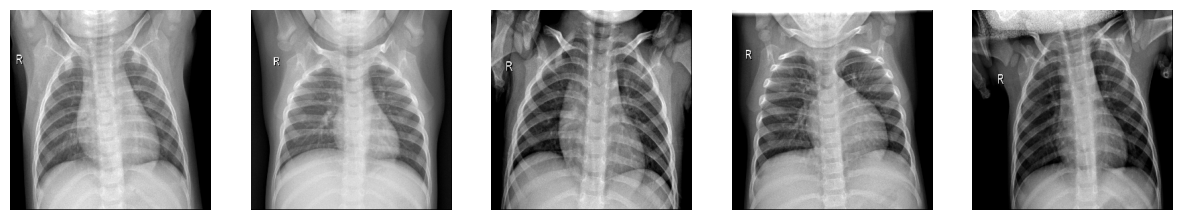

In [16]:
Normal_img = [NORMAL_DIR]
for f_index,f in enumerate(Normal_img):
    all_files = os.listdir(f)
    n_rows = 1

    fig, axes = plt.subplots(n_rows, 5, figsize=(15, n_rows*3))

    for i, ax in enumerate(axes.flat):
        if i < len(all_files):
            image = mh.imread(f + '/' + all_files[i])
            if image.ndim > 2:
                image = mh.colors.rgb2gray(image[:,:,:3])
            image = mh.imresize(image, (300, 300))
            ax.imshow(image, cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()

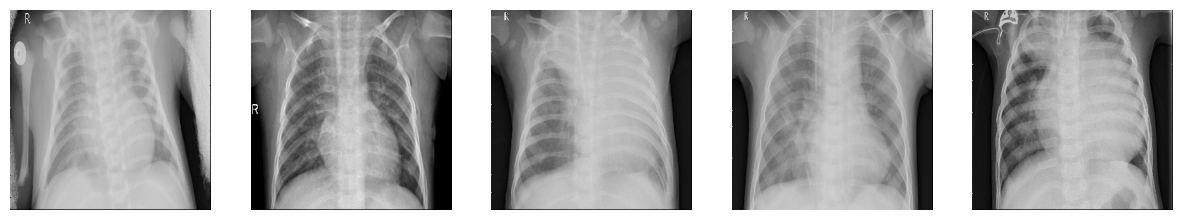

In [17]:
Pneumonia_img = [PNEUMONIA_DIR]
for f_index,f in enumerate(Pneumonia_img):
    all_files = os.listdir(f)
    n_rows = 1
    fig, axes = plt.subplots(n_rows, 5, figsize=(15, n_rows*3))

    for i, ax in enumerate(axes.flat):
        if i < len(all_files):
            image = mh.imread(f + '/' + all_files[i])
            if image.ndim > 2:
                image = mh.colors.rgb2gray(image[:,:,:3])
            image = mh.imresize(image, (300, 300))
            ax.imshow(image, cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()

**Task 3:** Setup training and testing data. [15 Points]

In [18]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays, pneumonia xrays, and covid xrays.
#
# The training data X_train will include 180 images (60 normal, 60 pneumonia, 60 covid).
# The testing data X_test will include the remaining 120 images (40 normal, 40 pneumonia, 40 covid).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the y_train vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia, and 2 for a covid scan.

In [19]:
TRAINING_COUNT = 60

X_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_train[t_pos] = image
    t_pos += 1

In [20]:
# TODO: Please create the y_train vector with 0 for a normal image,
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
#0 - normal image
#1 - pneumonia image
#2 - covid image
y_train = np.zeros( (TRAINING_COUNT * 3), dtype=np.int32)
y_train[0:60] = 0
y_train[60:120] = 1
y_train[120:180] = 2

In [21]:
TESTING_COUNT = 40

X_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TESTING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test[t_pos] = image
    t_pos += 1

In [22]:
# TODO: Please create the y_test vector with 0 for a normal image,
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
#0 - normal image
#1 - pneumonia image
#2 - covid image
y_test = np.zeros( (TESTING_COUNT * 3), dtype=np.int32)
y_test[0:40] = 0
y_test[40:80] = 1
y_test[80:160] = 2

**Task 4:** Let's train and evaluate the Random Forest! [30 Points]

In [23]:
# Let's shuffle our training data.
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]

In [24]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [25]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is
# normal or pneumonia or covid.
fitted = clf.fit( X_train, y_train )

In [26]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [27]:
# TODO: YOUR ANSWER

The Random Forest Classifier technique generates a split at the decision nodes using a random dataset of training data and random circumstances. By using this method, overfitting concerns are avoided in predictions and the model performs better when it comes to generalizing to the dataset.

In [28]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( X_test, y_test )

1.0

In [29]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [30]:
# TODO: YOUR ANSWER

Yes, the model's performance provides an accuracy score of 1.0, indicating a 100% accurate forecast. It wasn't surprising given that the training and testing datasets we gave were anticipated to be 100% accurate. The results for both datasets were devoid of ambiguity and impurities. Hence, it wasn't shocking to me.

**Task 5:** Now, let's decrease the number of trees! [10 Points]

In [31]:
# How many trees are used in Task 4?

In [32]:
# TODO: YOUR ANSWER
n_estimators_used = clf.n_estimators
print(n_estimators_used)

100


In [ ]:
# Now, please use a single tree and observe the testing performance.

In [33]:
# TODO: YOUR CODE
clf_single_tree = RandomForestClassifier(n_estimators=1)
fitted_single_tree = clf_single_tree.fit( X_train, y_train )

clf_single_tree.score( X_test, y_test )

0.8916666666666667

In [ ]:
# Are you surprised?

It's not entirely surprising that using a single tree in a Random Forest classifier. Using the single-tree Random Forest classifier achieved an accuracy of 0.8916666666666667, which is slightly lower. This is expected because using only a single tree may not capture the full complexity of the dataset and may result in slightly lower performance.

In [34]:
# TODO: YOUR ANSWER

**Bonus:** Let's take a closer look! [33 Points]

In [35]:
# Let's run the fitted classifier on the remaining covid images.
# You might have noticed that there are 199 covid images but we only used 100 so far.
# Please evaluate the classifier on the remaining (previously unseen) 99 covid images
# and check the performance.

In [36]:
# TODO: YOUR CODE AND YOUR ANSWER
covid_images = 99
X_test_covid = np.zeros((covid_images, 300*300), dtype=np.float32)
t_pos=0

for d in data[2:]:
  for image in d[100: (100+covid_images)]:
    image = image.ravel()
    image /= image.max()
    X_test_covid[t_pos] = image
    t_pos += 1


In [37]:
y_test_covid_only = np.zeros( (covid_images), dtype=np.int32)
y_test_covid_only[0:] = 2
y_test_covid_only

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [39]:

predictions = clf.predict(X_test_covid)
predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2], dtype=int32)

In [40]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(X_test_covid_only) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

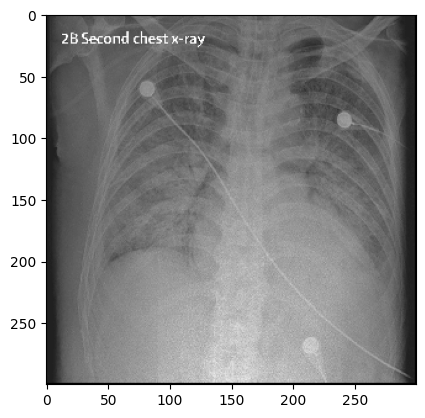

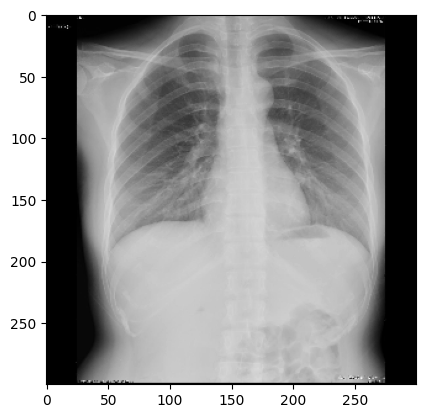

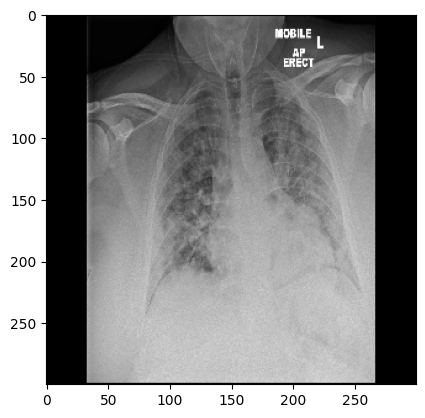

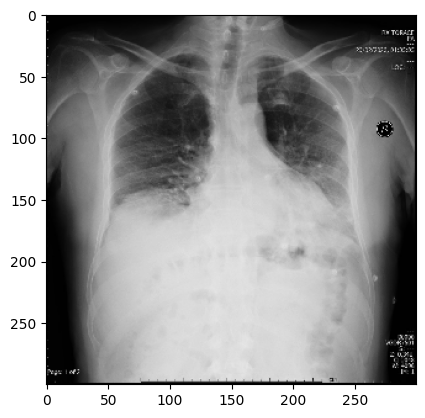

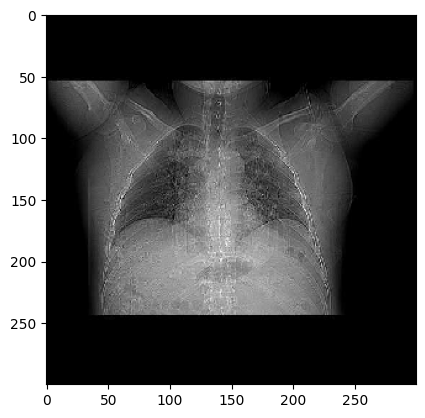

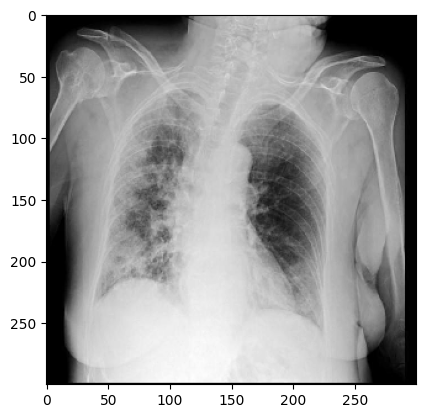

In [42]:
# TODO: YOUR CODE AND YOUR ANSWER
misclassified_img = X_test_covid[predictions!=2]
for i in misclassified_img:
    plt.imshow(i.reshape(300,300), cmap='gray')
    plt.show()

The images that are misclassified can have various problems such as not enough training dataset, low quality, damaged pictures or the lights and angles are in strange position that created issues while predicting the outcomes.


In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw